# Project Abstract

This project aims to take advantage of the knowledge that a group of
users can generate in order to recommend appropriate places. The main focus of the project is to develop a recommender system that would take ratings provided by users on certain places and would predict what those users would rate the other, unvisited, places.The recommendations will be made based on the places that the user visits and rates,while an online server will collect the data, save them in a database and process them to come up with the predictions.

## First task 

My first task is generate "fake" User, User rating and Resturants Data in order to try to make Recommendations

### Generating User and User ratings Data

In [1]:
import pandas as pd
from faker import Factory
import random
import numpy as np
import surprise 
faker = Factory.create()

### Users Data

In [2]:
def fakerecord():
     return{
         'name'   : faker.name(),
         'age'    : faker.random_int(min=20, max=40),
     }

In [3]:
User_data = pd.DataFrame([fakerecord() for _ in range(500)])
User_data['user_id']=pd.DataFrame({'user_id':range(1,501)})

In [4]:
User_data.head()

,age,name,user_id
0,21,Ruth Byrd,1
1,34,Dan Parker,2
2,24,Matthew Maldonado,3
3,30,Kristie Maynard,4
4,37,Denise Reed,5


### Users Ratings

In [5]:
def fakerRecord():
     return{
         'User_id'         : faker.random_int(min=1, max=501),
         'Resturant_id'    : faker.random_int(min=1, max=50),
         'Ratings'         : faker.random_int(min=0, max=5)
         
     }

In [6]:
Ratings_data = pd.DataFrame([fakerRecord() for _ in range(1000)])
Ratings_data = Ratings_data.sort_values(by=['User_id'])
Ratings_data.head()

,Ratings,Resturant_id,User_id
836,4,44,1
746,0,28,1
127,2,48,1
889,3,29,1
831,4,4,2


### Resturants Data

In [7]:
Resturants_data=pd.read_csv('Mansoura_Resturants.csv')
Resturants_data[['Ratings']] = round(Resturants_data[['Ratings']])
Resturants_data['Resturant_id'] = pd.DataFrame({'Resturant_id': range(1, 50)})
Resturants_data.head()

,Resturant_name,Location,Tags,Ratings,Resturant_id
0,B7ri,Gehan Street,Seafood,4.0,1
1,Pizza Maxx,Toreel Area,Pasta,4.0,2
2,Syrian Taste,Gihan Street,Crepes and Waffles,4.0,3
3,KFC,El Mansoura University,Sandwiches,4.0,4
4,Pizza Hut,El Mansoura University,Pasta,4.0,5


In [8]:
main_tags=set(Resturants_data['Tags'])
Rest =pd.concat([Resturants_data, pd.get_dummies(Resturants_data.Tags).rename(columns = "{}".format)], axis = 1)
Rest.head()

,Resturant_name,Location,Tags,Ratings,Resturant_id,Asian,Bakery and Cakes,Burgers,Crepes and Waffles,Desserts,El Meroor Area,Grills,Oriental,Pasta,Pizza,Salads,Sandwiches,Seafood,Seyami
0,B7ri,Gehan Street,Seafood,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Pizza Maxx,Toreel Area,Pasta,4.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Syrian Taste,Gihan Street,Crepes and Waffles,4.0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,KFC,El Mansoura University,Sandwiches,4.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Pizza Hut,El Mansoura University,Pasta,4.0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
Users_Ratings_data = pd.merge(Ratings_data , Resturants_data[['Resturant_name','Resturant_id']],on='Resturant_id')

In [10]:
Users_Ratings_data.head()

,Ratings,Resturant_id,User_id,Resturant_name
0,0,28,1,Gindofli
1,0,28,5,Gindofli
2,0,28,24,Gindofli
3,3,28,25,Gindofli
4,5,28,26,Gindofli


(array([ 115.,    0.,  111.,    0.,  125.,    0.,  146.,    0.,  136.,  138.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ]),
 <a list of 10 Patch objects>)

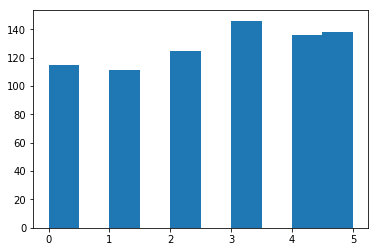

In [58]:
plt.hist(Users_Ratings_data['Ratings'])

In [59]:
Users_Ratings_data.groupby(['Ratings'])['User_id'].count()

Ratings
0    115
1    111
2    125
3    146
4    136
5    138
Name: User_id, dtype: int64

(array([ 2.,  3.,  3.,  9.,  6.,  5.,  5.,  4.,  0.,  2.]),
 array([ 11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,  29.,  31.]),
 <a list of 10 Patch objects>)

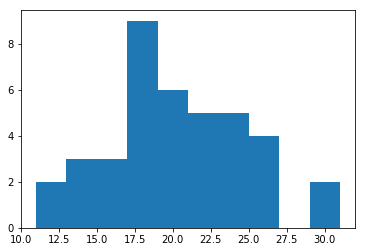

In [60]:
plt.hist(Users_Ratings_data.groupby(['Resturant_id'])['Resturant_id'].count())

### Rating Matrix Representation 

In [67]:
n_users = Users_Ratings_data['User_id'].unique().shape[0]

In [69]:
n_resturants =Users_Ratings_data['Resturant_id'].unique().shape[0print(str(n_users) + ' users')]

In [68]:
print(str(n_users) + ' users')

397 users


In [70]:
print(str(n_resturants) + ' resturants')

39 resturants


In [71]:
ratings = np.zeros((n_users, n_resturants))

In [73]:
for row in Users_Ratings_data.itertuples():
                                ratings[row[1]-1, row[2]-1] = row[3]

In [75]:
type(ratings)
ratings.shape

(397, 39)

In [76]:
ratings

array([[ 500.,  439.,  461., ...,  180.,  331.,  143.],
       [ 365.,  362.,  434., ...,  223.,  412.,  452.],
       [ 478.,  352.,  208., ...,  484.,  376.,  476.],
       ..., 
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [ 323.,  423.,  438., ...,  265.,  274.,  395.]])

In [78]:
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 1.47%


### Creating training and test sets

In [80]:
! pip install sklearn

  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/omar/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn
You are using pip version 9.0.1, however version 9.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [87]:
from sklearn.cross_validation import train_test_split
import sklearn

In [82]:
ratings_train, ratings_test = train_test_split(ratings,test_size=0.33,
random_state=42)

In [84]:
ratings_train.shape

(265, 39)

In [85]:
ratings_test.shape

(132, 39)

### User-based similarity calculation

In [89]:
dist_out =1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [90]:
type(dist_out)
dist_out.shape

(265, 265)

In [91]:
dist_out

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [93]:
user_pred = dist_out.dot(ratings_train) /np.array([np.abs(dist_out).sum(axis=1)]).T

In [100]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
#Ignore nonzero terms.
                 pred = pred[actual.nonzero()].flatten()
                 actual = actual[actual.nonzero()].flatten()
                 return mean_squared_error(pred, actual)

In [101]:
get_mse(user_pred, ratings_train)

9903.897317171979

In [102]:
get_mse(user_pred, ratings_test)

132348.59210526315

### Finding TopN Nearest Neighbours

In [103]:
from sklearn.neighbors import NearestNeighbors

In [104]:
k=5
neigh = NearestNeighbors(k,'cosine')

In [105]:
neigh.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius='cosine')

In [106]:
top_k_distances,top_k_users = neigh.kneighbors(ratings_train,return_distance=True)

In [109]:
top_k_distances.shape

(265, 5)

In [110]:
top_k_users.shape

(265, 5)

In [111]:
top_k_users[0]

array([130,   1,   0,  63, 264])